In [3]:
import os
import pandas as pd
import glob

def generate_unique_filename(base_name, extension):
    """生成唯一的文件名"""
    counter = 1
    while True:
        filename = f"{base_name}_{counter}{extension}"
        if not os.path.exists(filename):
            return filename
        counter += 1

# 设置数据目录路径
data_dir = "../test_data"
all_data = []

# 遍历所有label目录
print("开始处理数据文件...")
for label_dir in os.listdir(data_dir):
    if label_dir.startswith('label_'):
        glove_file = os.path.join(data_dir, label_dir, 'glove_data.csv')
        
        if os.path.exists(glove_file):
            print(f"正在读取: {glove_file}")
            try:
                df = pd.read_csv(glove_file)
                # 删除IMU相关列
                df = df.drop(['imu1', 'imu2', 'imu3'], axis=1)
                all_data.append(df)
            except Exception as e:
                print(f"处理文件 {glove_file} 时出错: {str(e)}")

# 合并所有数据框
if all_data:
    combined_data = pd.concat(all_data, ignore_index=True)
    
    # 生成不重复的文件名
    output_file = generate_unique_filename("data_test", ".csv")
    
    # 保存合并后的数据，设置float_format保持精度
    combined_data.to_csv(output_file, index=False, float_format='%.6f')
    print(f"\n数据已合并并保存到: {output_file}")
    print(f"总行数: {len(combined_data)}")
    print("保留的列:", list(combined_data.columns))
else:
    print("未找到任何数据文件")

开始处理数据文件...
正在读取: ../test_data\label_10_4\glove_data.csv
正在读取: ../test_data\label_11_4\glove_data.csv
正在读取: ../test_data\label_1_4\glove_data.csv
正在读取: ../test_data\label_2_4\glove_data.csv
正在读取: ../test_data\label_3_4\glove_data.csv
正在读取: ../test_data\label_4_4\glove_data.csv
正在读取: ../test_data\label_5_4\glove_data.csv
正在读取: ../test_data\label_6_4\glove_data.csv
正在读取: ../test_data\label_8_4\glove_data.csv
正在读取: ../test_data\label_9_4\glove_data.csv

数据已合并并保存到: data_test_1.csv
总行数: 97334
保留的列: ['timestamp', 'bend1', 'bend2', 'bend3', 'bend4', 'bend5', 'stress1', 'stress2', 'stress3', 'label']


C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24133 (\N{CJK UNIFIED IDEOGRAPH-5E45}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20256 (\N{CJK UNIFIED IDEOGRAPH-4F20}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24863 (\N{CJK UNIFIED IDEOGRAPH-611F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 221

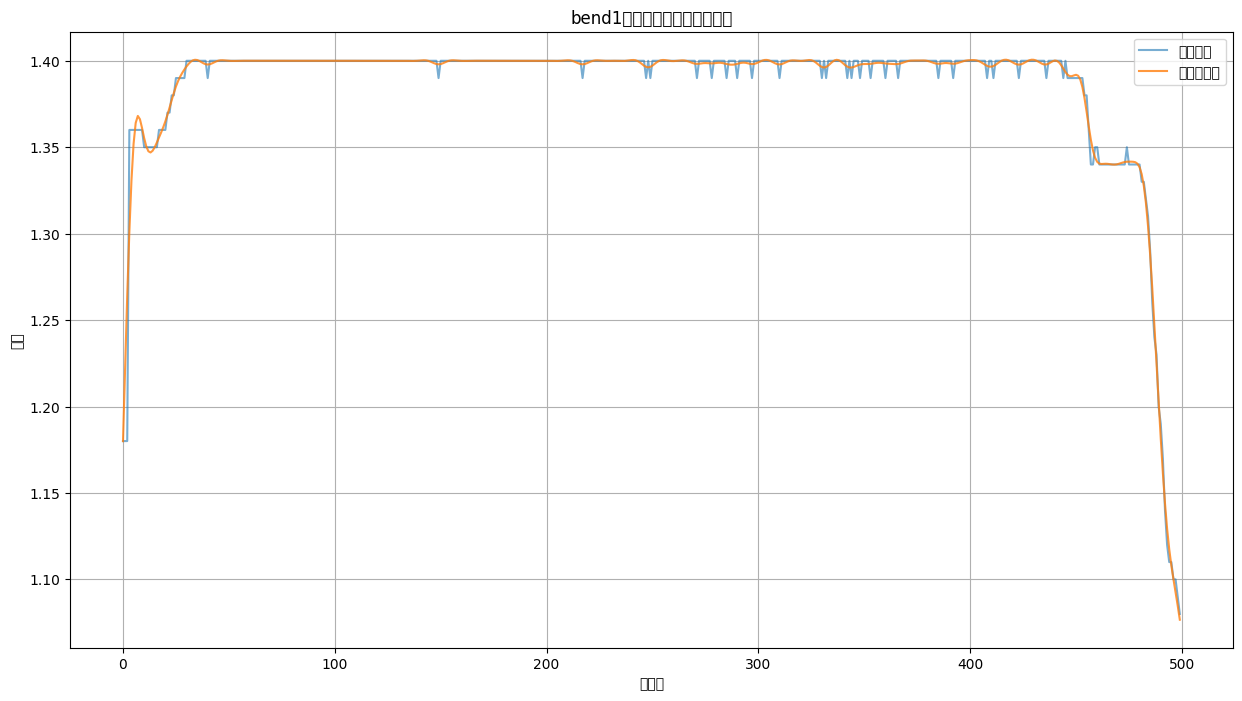

滤波后的数据已保存到: data_test_1_filtered.csv

滤波前后数据统计对比：

bend1传感器:
原始数据统计:
count    97334.000000
mean         1.194218
std          0.146733
min          0.820000
25%          1.070000
50%          1.170000
75%          1.360000
max          1.420000
Name: bend1, dtype: float64

滤波后数据统计:
count    97334.000000
mean         1.194219
std          0.146689
min          0.821126
25%          1.069996
50%          1.170000
75%          1.360976
max          1.448339
Name: bend1, dtype: float64

bend2传感器:
原始数据统计:
count    97334.000000
mean         1.106716
std          0.258351
min          0.710000
25%          0.900000
50%          0.970000
75%          1.350000
max          1.520000
Name: bend2, dtype: float64

滤波后数据统计:
count    97334.000000
mean         1.106716
std          0.258291
min          0.713977
25%          0.899924
50%          0.974283
75%          1.350021
max          1.568711
Name: bend2, dtype: float64

bend3传感器:
原始数据统计:
count    97334.000000
mean         1.007214
std          

In [4]:
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# 读取数据
df = pd.read_csv('data_test_1.csv')  # 确保使用正确的文件名

# 定义低通滤波器参数
fs = 100  # 采样频率（根据实际数据采集频率调整）
cutoff = 10  # 截止频率（根据需要调整）
order = 4  # 滤波器阶数

# 设计滤波器
nyquist = fs / 2
normalized_cutoff = cutoff / nyquist
b, a = signal.butter(order, normalized_cutoff, btype='low', analog=False)

# 需要滤波的列名
columns_to_filter = ['bend1', 'bend2', 'bend3', 'bend4', 'bend5', 
                    'stress1', 'stress2', 'stress3']

# 对每列数据进行滤波
filtered_data = df.copy()
for col in columns_to_filter:
    filtered_data[col] = signal.filtfilt(b, a, df[col])

# 可视化对比（选择第一个传感器数据作为示例）
plt.figure(figsize=(15, 8))
plt.plot(df['bend1'].iloc[0:500], label='原始数据', alpha=0.6)
plt.plot(filtered_data['bend1'].iloc[0:500], label='滤波后数据', alpha=0.8)
plt.title('bend1传感器数据滤波前后对比')
plt.xlabel('采样点')
plt.ylabel('幅值')
plt.legend()
plt.grid(True)
plt.show()

# 保存滤波后的数据
output_filename = 'data_test_1_filtered.csv'
filtered_data.to_csv(output_filename, index=False)
print(f"滤波后的数据已保存到: {output_filename}")

# 打印滤波前后的统计信息
print("\n滤波前后数据统计对比：")
for col in columns_to_filter:
    print(f"\n{col}传感器:")
    print("原始数据统计:")
    print(df[col].describe())
    print("\n滤波后数据统计:")
    print(filtered_data[col].describe())


标签 10 处理完成:
原始样本数: 8408
活动段样本数: 8408
生成窗口数: 839

标签 11 处理完成:
原始样本数: 8764
活动段样本数: 8764
生成窗口数: 875

标签 1 处理完成:
原始样本数: 11309
活动段样本数: 11309
生成窗口数: 1129

标签 2 处理完成:
原始样本数: 11415
活动段样本数: 11415
生成窗口数: 1140

标签 3 处理完成:
原始样本数: 14458
活动段样本数: 14458
生成窗口数: 1444

标签 4 处理完成:
原始样本数: 11601
活动段样本数: 11601
生成窗口数: 1159

标签 5 处理完成:
原始样本数: 7895
活动段样本数: 7895
生成窗口数: 788

标签 6 处理完成:
原始样本数: 10993
活动段样本数: 10993
生成窗口数: 1098

标签 8 处理完成:
原始样本数: 6306
活动段样本数: 6306
生成窗口数: 629

标签 9 处理完成:
原始样本数: 6185
活动段样本数: 6185
生成窗口数: 617

数据分割完成:
特征形状: (9718, 20, 8)
标签形状: (9718,)


C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24133 (\N{CJK UNIFIED IDEOGRAPH-5E45}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31532 (\N{CJK UNIFIED IDEOGRAPH-7B2C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 200

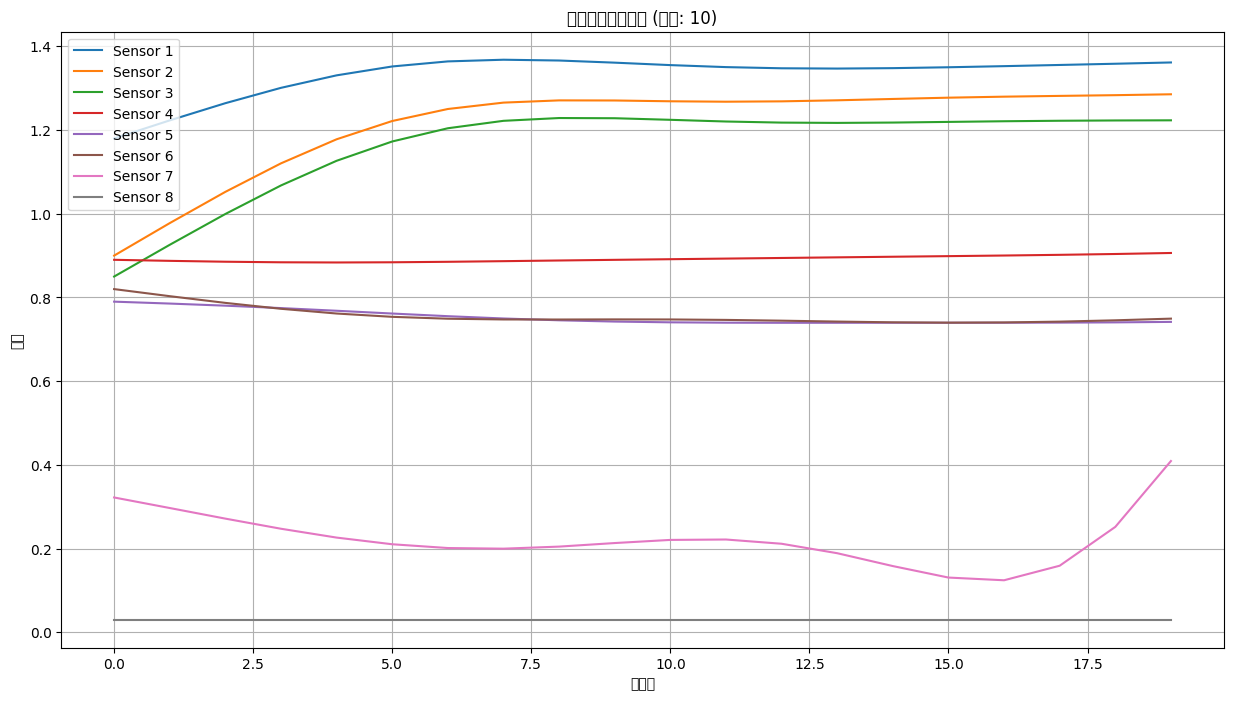

In [5]:
import numpy as np
import pandas as pd

class GloveDataSegmentation:
    def __init__(self, window_size=30, overlap=0.5, energy_threshold=0.4):
        """初始化分割参数
        
        Args:
            window_size (int): 滑动窗口大小
            overlap (float): 窗口重叠比例 (0-1)
            energy_threshold (float): 能量阈值系数
        """
        self.window_size = window_size
        self.overlap = overlap
        self.stride = int(window_size * (1 - overlap))
        self.energy_threshold = energy_threshold
        
    def sliding_window(self, data, label):
        """使用滑动窗口分割数据"""
        windows = []
        labels = []
        
        n_samples = len(data)
        n_slides = (n_samples - self.window_size) // self.stride + 1
        
        for i in range(n_slides):
            start = i * self.stride
            end = start + self.window_size
            
            if end <= n_samples:
                window = data[start:end]
                windows.append(window)
                labels.append(label)
                
        return np.array(windows), np.array(labels)

    def calculate_energy(self, data):
        """计算传感器总能量
        
        Args:
            data: shape (n_samples, n_features)
        """
        # 分别计算bend和stress的能量
        bend_energy = np.sum(np.square(data[:, :5]), axis=1)  # bend1-5
        stress_energy = np.sum(np.square(data[:, 5:8]), axis=1)  # stress1-3
        
        # 加权合成总能量
        total_energy = 0.6 * bend_energy + 0.4 * stress_energy
        return total_energy
    
    def detect_activity(self, data):
        """检测活动段"""
        energy = self.calculate_energy(data)
        dynamic_threshold = np.mean(energy) + np.std(energy)
        # activity_threshold = dynamic_threshold * self.energy_threshold
        # print(activity_threshold)
        activity_threshold = 1.2
        return energy > activity_threshold
    
    def segment_signals(self, data_path='data_test_1_filtered.csv'):
        """分割活动段
        
        Args:
            data_path: 预处理后的数据文件路径
        """
        try:
            # 读取预处理后的数据
            df = pd.read_csv(data_path)
            
            # 提取传感器数据列
            sensor_cols = ['bend1', 'bend2', 'bend3', 'bend4', 'bend5',
                         'stress1', 'stress2', 'stress3']
            
            all_windows = []
            all_labels = []
            
            # 对每个标签进行处理
            for label in df['label'].unique():
                # 提取当前标签的数据
                label_data = df[df['label'] == label][sensor_cols].values
                
                # 检测活动段
                activity_mask = self.detect_activity(label_data)
                active_data = label_data[activity_mask]
                
                if len(active_data) >= self.window_size:
                    # 对活动段进行滑动窗口分割
                    windows, labels = self.sliding_window(active_data, label)
                    all_windows.extend(windows)
                    all_labels.extend(labels)
                
                print(f"\n标签 {label} 处理完成:")
                print(f"原始样本数: {len(label_data)}")
                print(f"活动段样本数: {len(active_data)}")
                print(f"生成窗口数: {len(windows) if 'windows' in locals() else 0}")
            
            # 转换为numpy数组
            X = np.array(all_windows)
            y = np.array(all_labels)
            
            # 保存分割后的数据
            np.save('segmented_X_test.npy', X)
            np.save('segmented_y_test.npy', y)
            
            print("\n数据分割完成:")
            print(f"特征形状: {X.shape}")
            print(f"标签形状: {y.shape}")
            
            return X, y
            
        except Exception as e:
            print(f"分割数据时出错: {str(e)}")
            return None, None

# 使用示例
segmenter = GloveDataSegmentation(window_size=20, overlap=0.5, energy_threshold=0.4)
X, y = segmenter.segment_signals()

# 可视化第一个窗口的数据
if X is not None and len(X) > 0:
    plt.figure(figsize=(15, 8))
    for i in range(8):
        plt.plot(X[0, :, i], label=f'Sensor {i+1}')
    plt.title(f'第一个窗口的数据 (标签: {y[0]})')
    plt.xlabel('采样点')
    plt.ylabel('幅值')
    plt.legend()
    plt.grid(True)
    plt.show()

In [6]:
import numpy as np
from scipy import signal

class GloveFeatureExtractor:
    def __init__(self):
        """初始化特征提取器"""
        # 8个通道(5个弯曲+3个压力)，每个通道4个特征
        self.n_features = 8 * 4
        self.feature_names = self._generate_feature_names()
        self.eps = 1e-10  # 用于数值稳定性
        
    def _generate_feature_names(self):
        """生成特征名称列表"""
        sensors = {
            'bend': 5,    # 5个弯曲传感器
            'stress': 3,  # 3个压力传感器
        }
        
        features = ['mean', 'max', 'change_rate', 'std']
        names = []
        
        for sensor_type, count in sensors.items():
            for i in range(1, count + 1):
                for feature in features:
                    names.append(f'{sensor_type}{i}_{feature}')
                    
        return names
    
    def extract_bend_features(self, data):
        """弯曲传感器特征提取
        
        Args:
            data: 单个传感器的时间序列数据
        Returns:
            list: [均值, 最大值, 变化率, 标准差]
        """
        features = [
            np.mean(data),                    # 平均弯曲程度
            np.max(data),                     # 最大弯曲角度
            np.mean(np.abs(np.diff(data))),   # 平均弯曲变化率
            np.std(data)                      # 弯曲波动程度
        ]
        return features
    
    def extract_stress_features(self, data):
        """压力传感器特征提取
        
        Args:
            data: 单个传感器的时间序列数据
        Returns:
            list: [均值, 最大值, 变化率, 标准差]
        """
        features = [
            np.mean(data),                    # 平均压力值
            np.max(data),                     # 最大压力值
            np.sum(np.abs(np.diff(data))),    # 压力累积变化
            np.std(data)                      # 压力波动程度
        ]
        return features
    
    
    def extract_features(self, window):
        """从一个时间窗口提取所有特征
        
        Args:
            window: shape (window_size, n_channels)的数据窗口
        Returns:
            np.array: 特征向量
        """
        try:
            # 数据预处理
            window = np.array(window, dtype=np.float64)
            window = signal.medfilt(window, kernel_size=3)
            
            features = []
            
            # 处理弯曲传感器数据 (0-4)
            for i in range(5):
                bend_data = window[:, i]
                if np.std(bend_data) < self.eps:
                    features.extend([0] * 4)
                else:
                    features.extend(self.extract_bend_features(bend_data))
            
            # 处理压力传感器数据 (5-7)
            for i in range(5, 8):
                stress_data = window[:, i]
                if np.std(stress_data) < self.eps:
                    features.extend([0] * 4)
                else:
                    features.extend(self.extract_stress_features(stress_data))
            
            return np.array(features)
            
        except Exception as e:
            print(f"特征提取错误: {str(e)}")
            return None

# 使用示例
def extract_features_from_segments(X, y):
    """从分段数据中提取特征
    
    Args:
        X: shape (n_segments, window_size, n_channels) 的分段数据
        y: shape (n_segments,) 的标签数据
    Returns:
        X_features: shape (n_segments, n_features) 的特征矩阵
        y: 对应的标签
    """
    extractor = GloveFeatureExtractor()
    X_features = []
    
    for i, segment in enumerate(X):
        features = extractor.extract_features(segment)
        if features is not None:
            X_features.append(features)
        else:
            print(f"警告：段 {i} 特征提取失败")
    
    return np.array(X_features), y[:len(X_features)]

# 加载分段数据
X = np.load('segmented_X_test.npy')
y = np.load('segmented_y_test.npy')

# 提取特征
X_features_test, y_test = extract_features_from_segments(X, y)

print(f"特征矩阵形状: {X_features_test.shape}")
print(f"标签形状: {y_test.shape}")
print(f"\n特征名称:")
extractor = GloveFeatureExtractor()
for i, name in enumerate(extractor.feature_names):
    print(f"{i+1}. {name}")

特征矩阵形状: (9718, 32)
标签形状: (9718,)

特征名称:
1. bend1_mean
2. bend1_max
3. bend1_change_rate
4. bend1_std
5. bend2_mean
6. bend2_max
7. bend2_change_rate
8. bend2_std
9. bend3_mean
10. bend3_max
11. bend3_change_rate
12. bend3_std
13. bend4_mean
14. bend4_max
15. bend4_change_rate
16. bend4_std
17. bend5_mean
18. bend5_max
19. bend5_change_rate
20. bend5_std
21. stress1_mean
22. stress1_max
23. stress1_change_rate
24. stress1_std
25. stress2_mean
26. stress2_max
27. stress2_change_rate
28. stress2_std
29. stress3_mean
30. stress3_max
31. stress3_change_rate
32. stress3_std


模型加载成功: random_forest_model_20250218_155607.pkl

===== 模型预测性能评估 =====
总体准确率 (Accuracy): 0.3177
精确率 (Precision): 0.3645
召回率 (Recall): 0.3177
F1分数 (F1-score): 0.2721


C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 23454 (\N{CJK UNIFIED IDEOGRAPH-5B9E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26631 (\N{CJK UNIFIED IDEOGRAPH-6807}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lenovo\

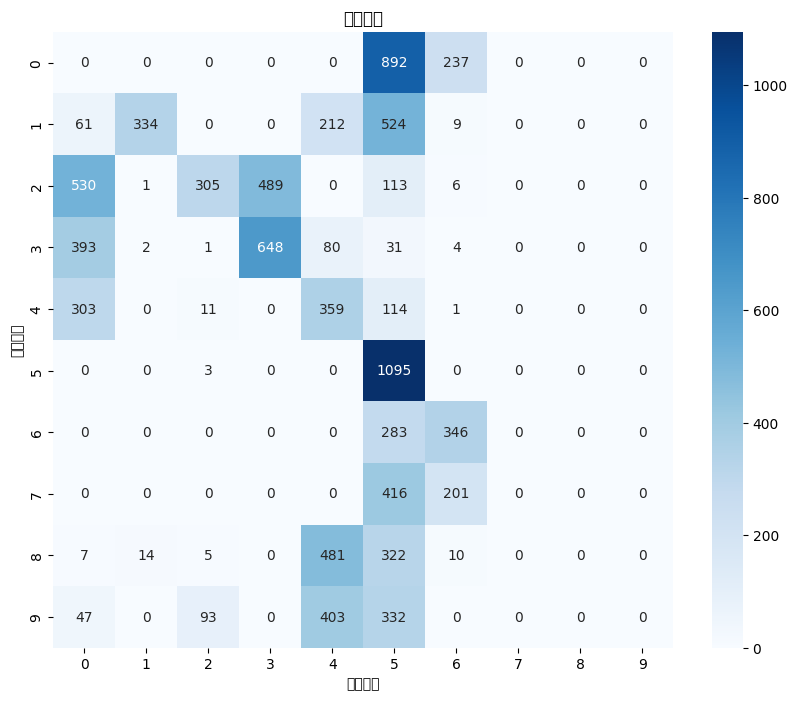


===== 各标签预测统计 =====

标签 1 统计:
  样本总数: 1129
  正确预测数: 0
  准确率: 0.0000
  精确率: 0.0000
  召回率: 0.0000
  F1分数: 0.0000

标签 2 统计:
  样本总数: 1140
  正确预测数: 334
  准确率: 0.2930
  精确率: 1.0000
  召回率: 0.2930
  F1分数: 0.4532

标签 3 统计:
  样本总数: 1444
  正确预测数: 305
  准确率: 0.2112
  精确率: 1.0000
  召回率: 0.2112
  F1分数: 0.3488

标签 4 统计:
  样本总数: 1159
  正确预测数: 648
  准确率: 0.5591
  精确率: 1.0000
  召回率: 0.5591
  F1分数: 0.7172

标签 5 统计:
  样本总数: 788
  正确预测数: 359
  准确率: 0.4556
  精确率: 1.0000
  召回率: 0.4556
  F1分数: 0.6260

标签 6 统计:
  样本总数: 1098
  正确预测数: 1095
  准确率: 0.9973
  精确率: 1.0000
  召回率: 0.9973
  F1分数: 0.9986

标签 8 统计:
  样本总数: 629
  正确预测数: 346
  准确率: 0.5501
  精确率: 1.0000
  召回率: 0.5501
  F1分数: 0.7097

标签 9 统计:
  样本总数: 617
  正确预测数: 0
  准确率: 0.0000
  精确率: 0.0000
  召回率: 0.0000
  F1分数: 0.0000

标签 10 统计:
  样本总数: 839
  正确预测数: 0
  准确率: 0.0000
  精确率: 0.0000
  召回率: 0.0000
  F1分数: 0.0000

标签 11 统计:
  样本总数: 875
  正确预测数: 0
  准确率: 0.0000
  精确率: 0.0000
  召回率: 0.0000
  F1分数: 0.0000


C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26679 (\N{CJK UNIFIED IDEOGRAPH-6837}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 390

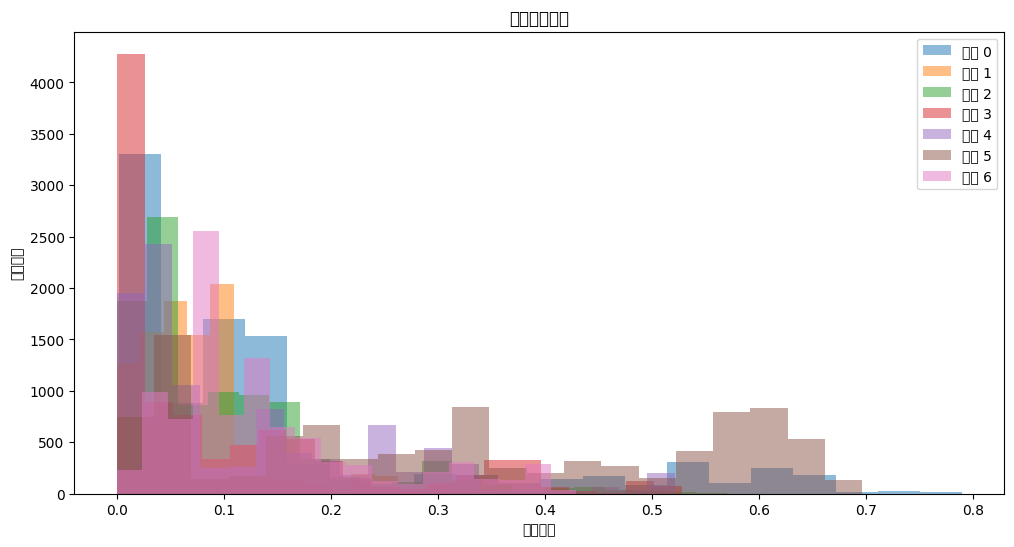

In [7]:
import numpy as np
import pickle
from scipy import signal
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


def load_model(model_path):
    """加载训练好的模型
    
    Args:
        model_path: pkl模型文件路径
    Returns:
        loaded_model: 加载的模型
    """
    try:
        with open(model_path, 'rb') as f:
            model = pickle.load(f)
        print(f"模型加载成功: {model_path}")
        return model
    except Exception as e:
        print(f"模型加载失败: {str(e)}")
        return None

def predict_gesture(model, X_features):
    """使用模型进行手势预测
    
    Args:
        model: 加载的随机森林模型
        X_features: 提取的特征向量
    Returns:
        predictions: 预测的标签
        probabilities: 预测的概率
    """
    try:
        predictions = model.predict(X_features)
        probabilities = model.predict_proba(X_features)
        return predictions, probabilities
    except Exception as e:
        print(f"预测失败: {str(e)}")
        return None, None

# 主程序
if __name__ == "__main__":
    # 加载模型
    model_path = 'random_forest_model_20250218_155607.pkl'
    rf_model = load_model(model_path)
    
    if rf_model is not None:
        # 进行预测
        predictions, probabilities = predict_gesture(rf_model, X_features_test)
        
        if predictions is not None:
            # 1. 计算各项评估指标
            accuracy = accuracy_score(y_test, predictions)
            precision = precision_score(y_test, predictions, average='weighted')
            recall = recall_score(y_test, predictions, average='weighted')
            f1 = f1_score(y_test, predictions, average='weighted')
            
            print("\n===== 模型预测性能评估 =====")
            print(f"总体准确率 (Accuracy): {accuracy:.4f}")
            print(f"精确率 (Precision): {precision:.4f}")
            print(f"召回率 (Recall): {recall:.4f}")
            print(f"F1分数 (F1-score): {f1:.4f}")
            
            # 2. 绘制混淆矩阵
            plt.figure(figsize=(10, 8))
            cm = confusion_matrix(y_test, predictions)
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
            plt.title('混淆矩阵')
            plt.xlabel('预测标签')
            plt.ylabel('真实标签')
            plt.show()
            
            # 3. 各标签详细统计
            unique_labels = np.unique(y_test)
            print("\n===== 各标签预测统计 =====")
            for label in unique_labels:
                mask = (y_test == label)
                label_predictions = predictions[mask]
                label_true = y_test[mask]
                
                label_accuracy = accuracy_score(label_true, label_predictions)
                label_precision = precision_score(label_true, label_predictions, average='weighted', zero_division=0)
                label_recall = recall_score(label_true, label_predictions, average='weighted', zero_division=0)
                label_f1 = f1_score(label_true, label_predictions, average='weighted', zero_division=0)
                
                total_samples = np.sum(mask)
                correct_predictions = np.sum(label_predictions == label_true)
                
                print(f"\n标签 {label} 统计:")
                print(f"  样本总数: {total_samples}")
                print(f"  正确预测数: {correct_predictions}")
                print(f"  准确率: {label_accuracy:.4f}")
                print(f"  精确率: {label_precision:.4f}")
                print(f"  召回率: {label_recall:.4f}")
                print(f"  F1分数: {label_f1:.4f}")
            
            # 4. 预测概率分布
            plt.figure(figsize=(12, 6))
            for i in range(len(probabilities[0])):
                plt.hist(probabilities[:, i], alpha=0.5, label=f'标签 {i}', bins=20)
            plt.title('预测概率分布')
            plt.xlabel('预测概率')
            plt.ylabel('样本数量')
            plt.legend()
            plt.show()